# Principal component analysis (PCA) 
##### Principal components analysis (PCA) is a dimensionality reduction technique that enables you to identify correlations and patterns in a data set so that it can be transformed into a data set of significantly lower dimension without loss of any important information.
 -   The main idea behind PCA is to figure out patterns and correlations among various features in the data set. On finding a strong correlation between different variables, a final decision is made about reducing the dimensions of the data in such a way that the significant data is still retained.
 -  The same is done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order. 
 -  So, in this way,the 1st principal component retains maximum variation that was present in the original components. 
 - The principal components are the eigenvectors of a covariance matrix, and hence they are orthogonal.
 
### Step By Step Computation Of PCA
The below steps need to be followed to perform dimensionality reduction using PCA:
- Standardization of the data
- Computing the covariance matrix
- Calculating the eigenvectors and eigenvalues
- Computing the Principal Components (select the initial N Eigen vectors)
- Reducing the dimensions of the data set into N-dimensions

##### Eigenvectors are used for understanding linear transformations. In data analysis, we usually calculate the eigenvectors for a correlation or covariance matrix. Eigenvectors are the directions along which a particular linear transformation acts by flipping, compressing or stretching.
##### Eigenvalue can be referred to as the strength of the transformation in the direction of eigenvector or the factor by which the compression occurs.
#### Rotation:
##### Rotation is a significant step in PCA as it maximizes the separation within the variance obtained by components. Due to this, the interpretation of components becomes easier.
The motive behind doing PCA is to choose fewer components that can explain the greatest variance in a dataset. When rotation is performed, the original coordinates of the points get changed. However, there is no change in the relative position of the components.
If the components are not rotated, then we need more extended components to describe the variance.

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data
#### Lets work with cancer data

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

Lets check the component present in cancer data

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
df=pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### PCA Visualisation
It's difficult do visulaize high dimensional data, we can use PCA to find first two components, and visualize data in this new, 2D space, with single scatterplot.
#### Scaling Data
Before transforming into PCA we must scale our dat so that each feature has a single unit variance

In [9]:
#Scaling function
def standard_scaling(df):
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    scaler.fit(df)
    scaled_data=scaler.transform(df)
    return scaled_data

In [10]:
scaled_data=standard_scaling(df)

Note that scaled data is now numpy array instead of dataframe

In [13]:
scaled_data.shape

(569, 30)

In [14]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### PCA
We initiate PCA, find component using fit(), then apply the rotation and dimensionality  reduction by calling transform()
We can also specify number of components.

In [15]:
#PCA Function
def PCA_function(scaled_data, n):
    from sklearn.decomposition import PCA
    pca=PCA(n_components=n)
    pca.fit(scaled_data)
    x_pca=pca.transform(scaled_data)
    return x_pca

In [16]:
x_pca=PCA_function(scaled_data,2)

In [17]:
x_pca.shape

(569, 2)

All the 30 features are transformed into just 2 principal components

Lets plot these two dimension out.

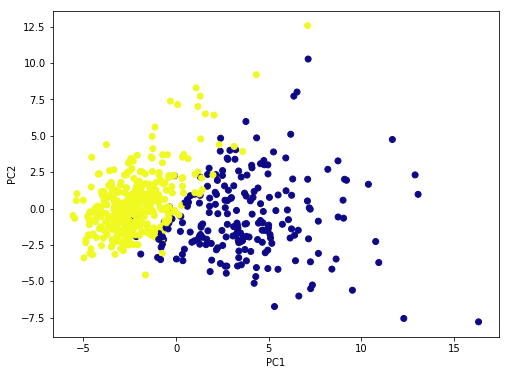

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'], cmap='plasma')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Clearly by transforming into 2 components we can easily separate target class.

#### Lets check some PCA atributes with different number of components

n_components=2

In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [24]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

In [25]:
#The amount of variance that each PC explains
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [27]:
#Cumulative sum
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([44.27, 63.24])

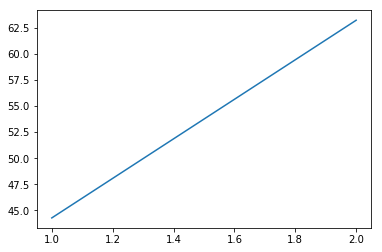

In [29]:
plt.plot(range(1,3,1),var1)

In [30]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [31]:
#return the average log-liklihood of each given sample
# means this will return average error in creating pca
pca.score(scaled_data)

-31.684883509998414

#### n_components=4

In [32]:
pca=PCA(n_components=4)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [33]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291015,  1.98412752])

In [34]:
#The amount of variance that each PC explains
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135])

In [35]:
#Cumulative sum
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([44.27, 63.24, 72.63, 79.23])

Four PCs are able to explain 79% of data variablity

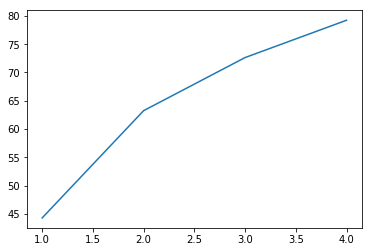

In [36]:
plt.plot(range(1,5,1),var1)

In [37]:
pca.score(scaled_data)

-27.01395715026827

#### Conclusion: 
We can clearly see that 2PCs are able to explain 63% of data variablity whereas 4PCs are able to expalain 79% of data variability
##### Optimal number of PCA compnents should explain at least 95% of total variations

In [48]:
for n in range(1,11):
    pca=PCA(n_components=n)
    pca.fit(scaled_data)
    var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    print(n,': ',var1)
    

1 :  [44.27]
2 :  [44.27 63.24]
3 :  [44.27 63.24 72.63]
4 :  [44.27 63.24 72.63 79.23]
5 :  [44.27 63.24 72.63 79.23 84.73]
6 :  [44.27 63.24 72.63 79.23 84.73 88.75]
7 :  [44.27 63.24 72.63 79.23 84.73 88.75 91.  ]
8 :  [44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59]
9 :  [44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98]
10 :  [44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15]


So total 10PCs can explain 95% of variability in cancer data

### An Approach to Choosing the Number of Components in a Principal Component Analysis

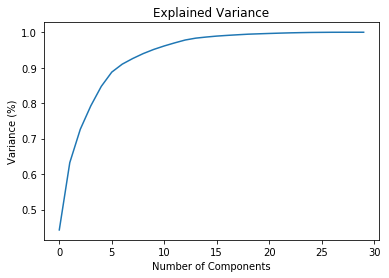

In [49]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(scaled_data)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

### Conclusion:
This plot tells us that selecting 10 components we can preserve something around 95% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.

### Difference between  PCA and Factor Analysis
##### PCA is a linear combination of variables; Factor Analysis is a measurement model of a latent variable.
        PC = w1(Y1) + w2(Y2) + w3(Y3) + w4(Y4)

        Y1 = b1*F + u1
        Y2 = b2*F + u2
        Y3 = b3*F + u3
        Y4 = b4*F + u4